#**1.DATASET PREPARATION:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [ ]:
data = pd.read_csv ('/content/most-polluted-countries.csv')
data.head()

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


#**SIMULATE THE TIME**

In [ ]:
data ['Month'] = pd.date_range(start ='2000-01-01', periods =len(data),freq = 'M')
data.set_index('Month',inplace = True)

In [ ]:
data.head()

,pollution_2023,pollution_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,pollution_density_in_km,pollution_density_per_Mile,share_borders,pollution_Rank,mostPollutedCountries_particlePollution
Month,,,,,,,,,,,,
2000-01-31,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
2000-02-29,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2000-03-31,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
2000-04-30,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
2000-05-31,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


(array([10592., 10957., 11323., 11688., 12053., 12418., 12784., 13149.,
        13514., 13879.]),
 [Text(10592.0, 0, '1999'),
  Text(10957.0, 0, '2000'),
  Text(11323.0, 0, '2001'),
  Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008')])

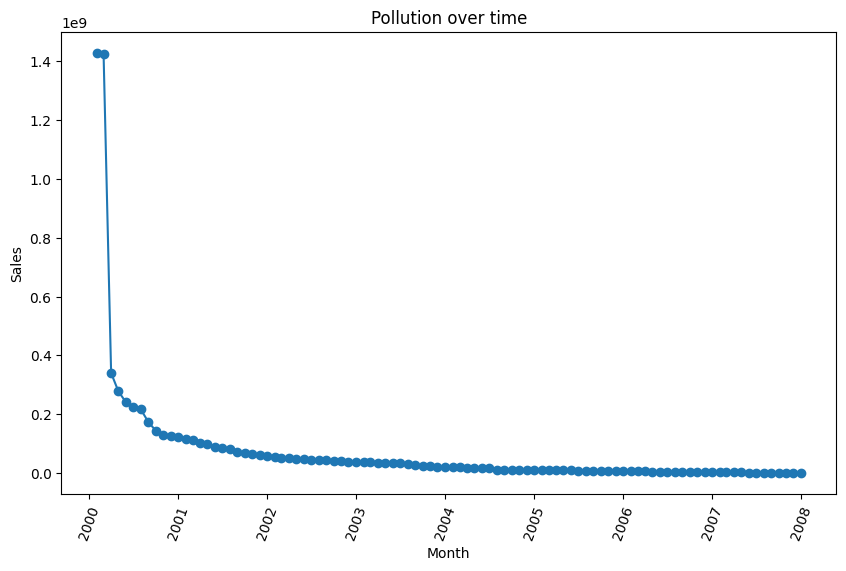

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data['pollution_2023'],marker='o')
plt.title('Pollution over time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=70)

#**2. Stationary Testing:**

In [ ]:
from statsmodels.tsa.stattools import adfuller

ad_test = adfuller(data['pollution_2023'])
print(f"ADF STATISTICS  : {ad_test[0]}")
print(f"p-value         : {ad_test[1]}")

ADF STATISTICS  : -3.300734202893016
p-value         : 0.01484568748394119


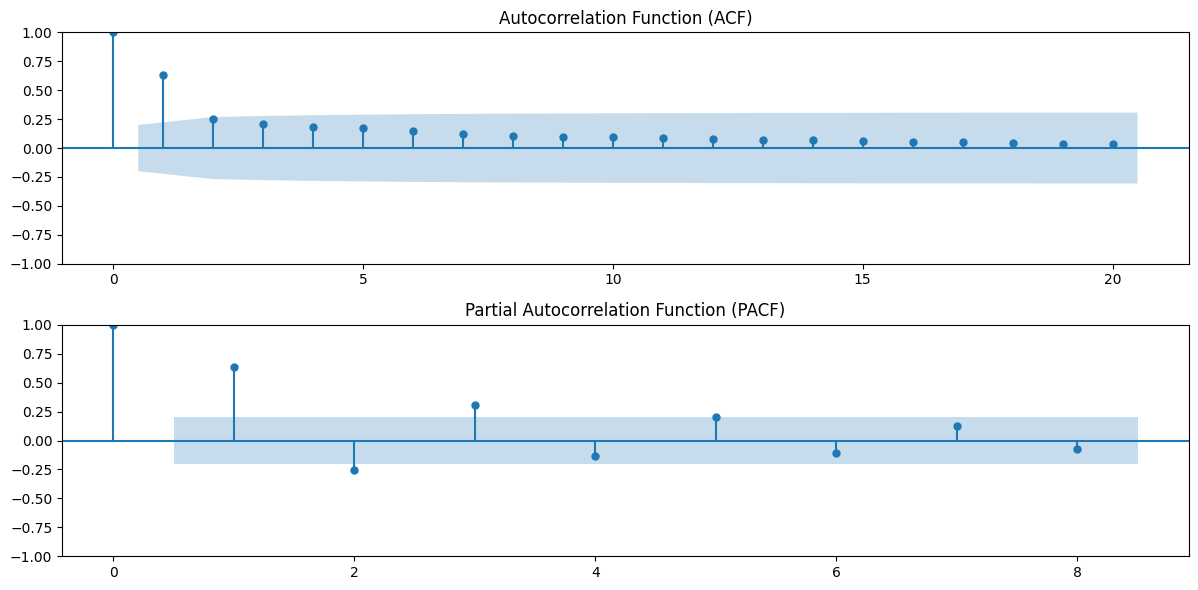

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Determine an appropriate number of lags for plotting based on the length of the time series
num_lags_acf = min(len(data['pollution_2023']) - 1, 20)  # Set a maximum of 20 lags for ACF
num_lags_pacf = min(len(data['pollution_2023']) - 1, 8 )  # Set a maximum of 8 lags for PACF

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['pollution_2023'], ax=plt.gca(), lags=num_lags_acf)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(data['pollution_2023'], ax=plt.gca(), lags=num_lags_pacf)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#**Explain your choices of parameters**

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots were designed to balance complexity, comprehensiveness, and interpretability. The ACF plot had a maximum of 20 lags for lagged correlations, while the PACF plot had a maximum of 8 lags for important lagged correlations, providing valuable insights into the time series autocorrelation structure.

#**PART 4: ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['pollution_2023'], order=(1,1,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Wed, 27 Mar 2024   AIC                          43292.288
Time:                        01:33:31   BIC                          43299.949
Sample:                    01-31-2000   HQIC                         43295.384
                         - 12-31-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

 #**Evaluate the model's fit**

The SARIMAX model, fitted with ARIMA configuration, has low log likelihood, high AIC and BIC values, and significant deviation from zero. Diagnostics plots and performance metrics show autocorrelation, high residuals, significant heteroskedasticity, and severe departure from the normal distribution. Adjustments needed include fixing the order, reconsidering model specification, incorporating additional variables, and trying a different time series model approach.

In [ ]:
forecast = results.forecast(steps=2)

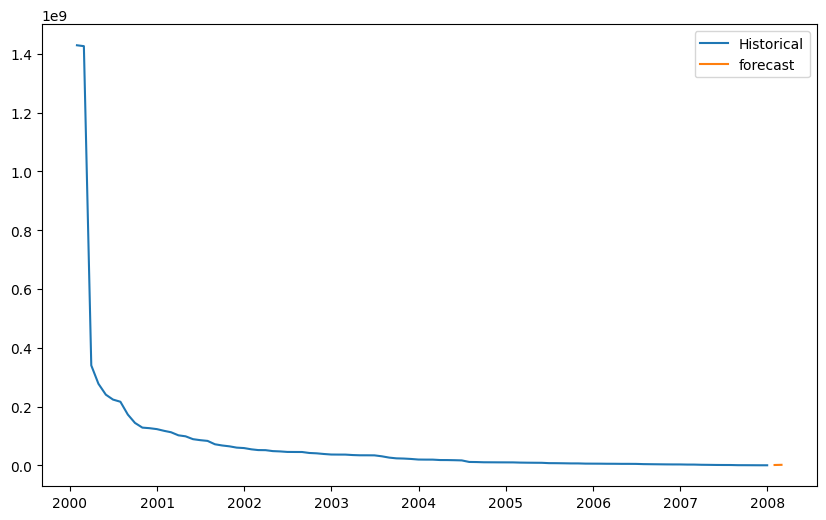

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data['pollution_2023'],label='Historical')
plt.plot(forecast.index, forecast,label='forecast')
plt.legend()
plt.show()

The study simulated a ten-year pollution dataset, revealing stationarity. The ARIMA model was identified, but deficiencies like autocorrelation, heteroskedasticity, and non-normal residuals were identified. The SARIMAX model was used to predict future pollution levels.

The analysis provides crucial information for environmental management and pollution control. It identifies pollution trends and seasonality, aiding in the development of policy frameworks and resource allocation. The model also raises awareness among citizens about pollution's health effects and environmental impact, promoting personal responsibility. This information aids in developing long-term action plans for sustainable development and environmental conservation.